In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
img = cv2.imread('hist2.tif',0)

In [3]:
intensity_count = [0] * 256

In [4]:
height,width = img.shape[:2]        
N = height * width 

In [5]:
high_contrast = np.zeros(img.shape) 

In [6]:
for i in range(0,height):
    for j in range(0,width):
        intensity_count[img[i][j]] += 1 

In [7]:
L = 256

intensity_count,total_values_used = np.histogram(img.flatten(),L,[0,L])      
pdf_list = np.ceil(intensity_count*(L-1)/img.size)                    
cdf_list = pdf_list.cumsum()  

In [8]:
for y in range(0, height):
    for x in range(0, width): 
        #Apply the new intensities in/our new image
        high_contrast[y,x] = cdf_list[img[y,x]] 

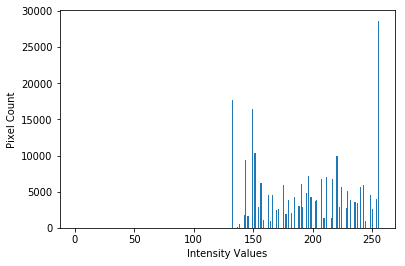

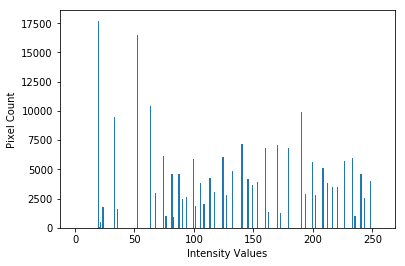

In [9]:
cv2.imwrite('high_contrast.png', high_contrast)                         
plt.hist(img.ravel(),256,[0,256])
plt.xlabel('Intensity Values')
plt.ylabel('Pixel Count')
plt.show()

plt.hist(high_contrast.ravel(),256,[0,256])	
plt.xlabel('Intensity Values')
plt.ylabel('Pixel Count')
plt.show()


In [17]:
#Displaying the Images
img = cv2.imread('hist2.tif',0)
cv2.imshow('Actual Image',img)
cv2.waitKey(0)
# cv2.destroyAllWindows()

#Display High Contrast Images
img = cv2.imread('high_contrast.png')
cv2.imshow('High Contrast Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()